In [23]:
from collections import OrderedDict
import numpy as np
import pandas as pd
from scipy.interpolate import griddata

In [24]:
df = pd.read_csv("optimization_result.3.csv", sep=",")
df = df.set_index("iteration")
z_col_origin = "objective"
z_col = "SharpeRatio"
df = df.rename(columns={z_col_origin: z_col})
df

,SharpeRatio,FAST_PERIOD,SIGNAL_PERIOD,SLOW_PERIOD
iteration,,,,
0,NaN,11,12,3
1,1.859751,7,5,4
2,2.519548,4,10,3
3,1.121793,5,8,3
4,2.691897,7,8,3
...,...,...,...,...
120,1.170015,5,6,3
121,NaN,12,7,3
122,NaN,6,3,4


In [25]:
parameters_all = df.columns.drop([z_col, "iteration"], errors="ignore")
parameters_all

Index(['FAST_PERIOD', 'SIGNAL_PERIOD', 'SLOW_PERIOD'], dtype='object')

In [26]:
PHI = (1 + 5**.5) / 2  # Golden ratio.
def fib(n):
    return int((PHI**n - (1-PHI)**n) / 5**.5)

In [27]:
#for parameter in parameters_all:
#    df[parameter] = df[parameter].map(fib)
#df

In [28]:
parameters_space = OrderedDict([(parameter, sorted(df[parameter].unique())) for parameter in parameters_all])
parameters_space

OrderedDict([('FAST_PERIOD', [3, 4, 5, 6, 7, 8, 9, 10, 11, 12]),
             ('SIGNAL_PERIOD', [3, 4, 5, 6, 7, 8, 9, 10, 11, 12]),
             ('SLOW_PERIOD', [3, 4])])

In [29]:
x_col, y_col = "FAST_PERIOD", "SIGNAL_PERIOD"

In [30]:
others_parameters = parameters_all.copy().drop([x_col, y_col])
others_parameters

Index(['SLOW_PERIOD'], dtype='object')

In [31]:
df2 = df[df["SLOW_PERIOD"] == 3]
# df2 = df[df["SLOW_PERIOD"] == fib(3)]
df2

,SharpeRatio,FAST_PERIOD,SIGNAL_PERIOD,SLOW_PERIOD
iteration,,,,
0,NaN,11,12,3
2,2.519548,4,10,3
3,1.121793,5,8,3
4,2.691897,7,8,3
6,2.951526,6,9,3
...,...,...,...,...
119,NaN,12,10,3
120,1.170015,5,6,3
121,NaN,12,7,3


In [32]:
df2 = df2[df2[z_col].notnull()]

In [33]:
x1 = np.linspace(df2[x_col].min(), df2[x_col].max(), len(df2[x_col].unique()))
y1 = np.linspace(df2[y_col].min(), df2[y_col].max(), len(df2[y_col].unique()))
x2, y2 = np.meshgrid(x1, y1)

In [34]:
# df2[z_col] = df2[z_col].fillna(df2[z_col].min() - 0.1)
df2.sort_values(z_col, ascending=False)

,SharpeRatio,FAST_PERIOD,SIGNAL_PERIOD,SLOW_PERIOD
iteration,,,,
73,5.093722,4,12,3
84,3.426238,7,4,3
102,3.423767,5,11,3
31,3.336293,4,11,3
49,3.296191,7,7,3
...,...,...,...,...
78,-1.914414,10,12,3
66,-1.914414,10,10,3
24,-2.417318,10,9,3


In [35]:
z2 = griddata((df2[x_col], df2[y_col]), df2[z_col], (x2, y2), method='cubic')

C:\Users\myuser\AppData\Local\Temp\ipykernel_43632\9044644.py:5: MatplotlibDeprecationWarning:

Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().



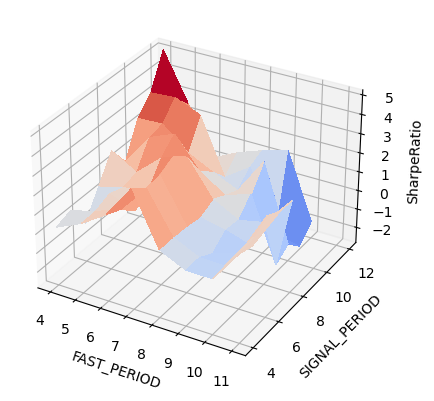

In [36]:
import matplotlib.pyplot as plt
from matplotlib import cm

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlabel(x_col)
ax.set_ylabel(y_col)
ax.set_zlabel(z_col)
surf = ax.plot_surface(x2, y2, z2, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

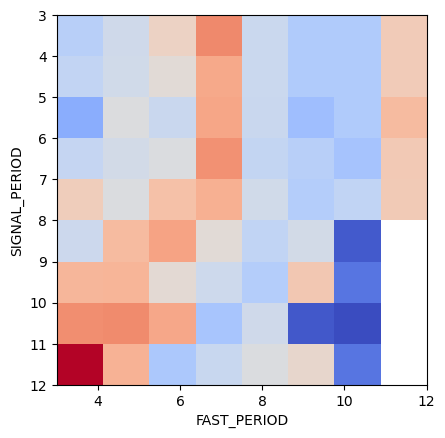

In [37]:
plt.xlabel(x_col)
plt.ylabel(y_col)
plt.imshow(z2, cmap=cm.coolwarm, extent=[3,12,12,3])

In [47]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Surface(z=z2, x=x2, y=y2, colorscale="balance")])
fig.update_layout(title=f"3D surface of {z_col} vs {x_col} & {y_col}", autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.update_layout(width=800, height=600)
fig.update_scenes(xaxis_title_text=x_col,  
                  yaxis_title_text=y_col,  
                  zaxis_title_text=z_col)
fig.show()